----------------------------------------
# Car Price Prediction
-------------------------------------------

In [1]:
import warnings
warnings.filterwarnings("ignore")

import re
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as st

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

sns.set_style("darkgrid")

## Loading Data
------------------------------

In [2]:
link = "C:/Users/parsh/Downloads/Car details v3.csv"

In [3]:
df = pd.read_csv(link)

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


# Cleaning the Data
-------------------------------

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

## Create a column of Brand
-------------------------------

In [7]:
l = lambda x:x.split()[0]

df["Brand"] = df["name"].apply(l)

In [8]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Brand
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti


## Create a column of Model
---------------------------------

In [9]:
def mod(x):
    x = x.split()
    x = x[1::]
    x = " ".join(x)
    return x

In [10]:
df["Model"] = df["name"].apply(mod)

In [11]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Brand,Model
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,Rapid 1.5 TDI Ambition
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,City 2017-2020 EXi
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,i20 Sportz Diesel
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,Swift VXI BSIII


## Delete the column of name
------------------------------------------

In [12]:
df.drop(columns=["name"],inplace=True)

In [13]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Brand,Model
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,Swift Dzire VDI
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,Rapid 1.5 TDI Ambition
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,City 2017-2020 EXi
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,i20 Sportz Diesel
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,Swift VXI BSIII


# Cleaning all columns one by one
------------------------------------

In [14]:
df["mileage"].fillna(df["mileage"].mode()[0],inplace=True)

In [15]:
l = lambda x:x.split()[0]

In [16]:
df["Mileage"] = df["mileage"].apply(l)

In [17]:
a = lambda x:x.split()[-1]

In [18]:
df["Mileage_Unit"] = df["mileage"].apply(a)

In [19]:
df.drop(columns=["mileage"],inplace=True)

In [20]:
df["Mileage"].dtype

dtype('O')

In [21]:
df["Mileage"] = df["Mileage"].astype(float)

In [22]:
df["Mileage"].dtype

dtype('float64')

In [23]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,torque,seats,Brand,Model,Mileage,Mileage_Unit
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,Swift Dzire VDI,23.40,kmpl
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,Rapid 1.5 TDI Ambition,21.14,kmpl
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,City 2017-2020 EXi,17.70,kmpl
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,i20 Sportz Diesel,23.00,kmpl
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,Swift VXI BSIII,16.10,kmpl


In [24]:
df["max_power"].unique

<bound method Series.unique of 0           74 bhp
1       103.52 bhp
2           78 bhp
3           90 bhp
4         88.2 bhp
           ...    
8123     82.85 bhp
8124       110 bhp
8125      73.9 bhp
8126        70 bhp
8127        70 bhp
Name: max_power, Length: 8128, dtype: object>

In [25]:
df["max_power"] = df["max_power"].str.replace("bhp","")
df["max_power"] = df["max_power"].str.replace(" ","")

In [26]:
df["max_power"].fillna(df["max_power"].mode()[0],inplace=True)

In [27]:
df[df["max_power"]==""]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,torque,seats,Brand,Model,Mileage,Mileage_Unit
4933,2000,80000,100000,CNG,Individual,Manual,Second Owner,796 CC,,NaN,8.0,Maruti,Omni CNG,10.9,km/kg


In [28]:
df["max_power"] = df["max_power"].str.replace("","0")

In [29]:
df["max_power"] = df["max_power"].astype(float)

In [30]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,torque,seats,Brand,Model,Mileage,Mileage_Unit
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248 CC,7040.0000,190Nm@ 2000rpm,5.0,Maruti,Swift Dzire VDI,23.40,kmpl
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498 CC,100030.0502,250Nm@ 1500-2500rpm,5.0,Skoda,Rapid 1.5 TDI Ambition,21.14,kmpl
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497 CC,7080.0000,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,City 2017-2020 EXi,17.70,kmpl
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396 CC,9000.0000,22.4 kgm at 1750-2750rpm,5.0,Hyundai,i20 Sportz Diesel,23.00,kmpl
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298 CC,8080.0200,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,Swift VXI BSIII,16.10,kmpl


In [31]:
df["engine"].unique

<bound method Series.unique of 0       1248 CC
1       1498 CC
2       1497 CC
3       1396 CC
4       1298 CC
         ...   
8123    1197 CC
8124    1493 CC
8125    1248 CC
8126    1396 CC
8127    1396 CC
Name: engine, Length: 8128, dtype: object>

In [32]:
df["engine"] = df["engine"].str.replace("CC","")

In [33]:
df["engine"] = df["engine"].astype(float)

In [34]:
df["engine"].fillna(df["engine"].mean(),inplace=True)

In [35]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,torque,seats,Brand,Model,Mileage,Mileage_Unit
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248.0,7040.0000,190Nm@ 2000rpm,5.0,Maruti,Swift Dzire VDI,23.40,kmpl
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498.0,100030.0502,250Nm@ 1500-2500rpm,5.0,Skoda,Rapid 1.5 TDI Ambition,21.14,kmpl
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497.0,7080.0000,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,City 2017-2020 EXi,17.70,kmpl
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396.0,9000.0000,22.4 kgm at 1750-2750rpm,5.0,Hyundai,i20 Sportz Diesel,23.00,kmpl
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298.0,8080.0200,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,Swift VXI BSIII,16.10,kmpl


In [36]:
df["torque"].str.split()

0                   [190Nm@, 2000rpm]
1              [250Nm@, 1500-2500rpm]
2           [12.7@, 2,700(kgm@, rpm)]
3       [22.4, kgm, at, 1750-2750rpm]
4           [11.5@, 4,500(kgm@, rpm)]
                    ...              
8123              [113.7Nm@, 4000rpm]
8124    [24@, 1,900-2,750(kgm@, rpm)]
8125                [190Nm@, 2000rpm]
8126           [140Nm@, 1800-3000rpm]
8127           [140Nm@, 1800-3000rpm]
Name: torque, Length: 8128, dtype: object

In [37]:
df["torque"].fillna(df["torque"].mode()[0],inplace=True)

In [38]:
nm = []
r = []
for i in df["torque"].str.split():
    nm.append(i[0])
    r.append(" ".join(i[1:]))

In [39]:
df["nm"] = nm
df["rpm"] = r

In [40]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,torque,seats,Brand,Model,Mileage,Mileage_Unit,nm,rpm
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248.0,7040.0000,190Nm@ 2000rpm,5.0,Maruti,Swift Dzire VDI,23.40,kmpl,190Nm@,2000rpm
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498.0,100030.0502,250Nm@ 1500-2500rpm,5.0,Skoda,Rapid 1.5 TDI Ambition,21.14,kmpl,250Nm@,1500-2500rpm
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497.0,7080.0000,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,City 2017-2020 EXi,17.70,kmpl,12.7@,"2,700(kgm@ rpm)"
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396.0,9000.0000,22.4 kgm at 1750-2750rpm,5.0,Hyundai,i20 Sportz Diesel,23.00,kmpl,22.4,kgm at 1750-2750rpm
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298.0,8080.0200,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,Swift VXI BSIII,16.10,kmpl,11.5@,"4,500(kgm@ rpm)"


# Regular Expression
---------------------------------------

In [41]:
x = []
for i in df["nm"]:
    y = re.sub("[^0-9.]","",i)
    x.append(y)

In [42]:
df["nm"] = x

In [43]:
a = []
for i in df["rpm"]:
    b = re.sub("[^0-9-]","",i)
    a.append(b)

In [44]:
df["rpm"] = a

In [45]:
df.drop(columns=["torque"],inplace=True)

In [46]:
df["nm"] = df["nm"].astype(float)

In [47]:
x = []
for i in df["rpm"]:
    y = i.split("-")
    if y[-1]=="":
        x.append(0)
    else:
        x.append(float(y[-1]))

In [48]:
df["rpm"] = x

In [49]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats,Brand,Model,Mileage,Mileage_Unit,nm,rpm
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248.0,7040.0000,5.0,Maruti,Swift Dzire VDI,23.40,kmpl,190.0,2000.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498.0,100030.0502,5.0,Skoda,Rapid 1.5 TDI Ambition,21.14,kmpl,250.0,2500.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497.0,7080.0000,5.0,Honda,City 2017-2020 EXi,17.70,kmpl,12.7,2700.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396.0,9000.0000,5.0,Hyundai,i20 Sportz Diesel,23.00,kmpl,22.4,2750.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298.0,8080.0200,5.0,Maruti,Swift VXI BSIII,16.10,kmpl,11.5,4500.0


In [50]:
df.isna().sum()

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
engine             0
max_power          0
seats            221
Brand              0
Model              0
Mileage            0
Mileage_Unit       0
nm                 0
rpm                0
dtype: int64

In [51]:
df["seats"].fillna(df["seats"].mean(),inplace=True)

In [52]:
df.isna().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
engine           0
max_power        0
seats            0
Brand            0
Model            0
Mileage          0
Mileage_Unit     0
nm               0
rpm              0
dtype: int64

In [53]:
df.dtypes

year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
engine           float64
max_power        float64
seats            float64
Brand             object
Model             object
Mileage          float64
Mileage_Unit      object
nm               float64
rpm              float64
dtype: object

# EDA = Exploratory Data Analysis
--------------------------------------------

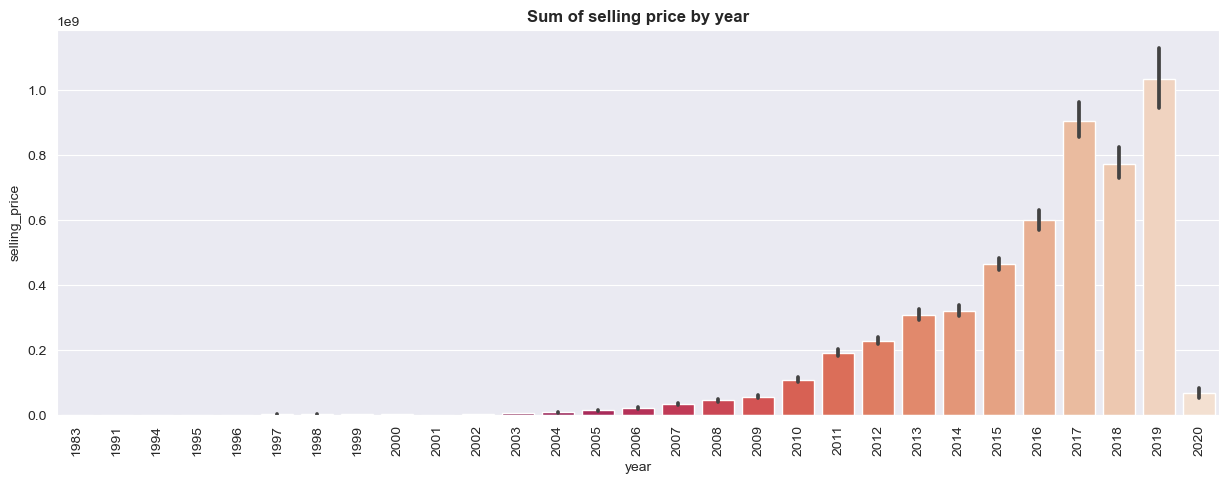

In [54]:
plt.figure(figsize=(15,5))
sns.barplot(data = df,x = "year",y = "selling_price",estimator="sum",palette="rocket")
plt.title("Sum of selling price by year",fontweight="bold")
plt.xticks(rotation = 90)
plt.show()

## Insights from the Bar Chart:
-------------------------------------------
- Increasing Trend: The bar chart clearly shows a growing trend in the sum of selling prices over the years. The selling price has been significantly     increasing over the past two decades.
- Sharp Increase After 2010: The trend becomes more pronounced after the year 2010, indicating a potentially accelerated growth in the market.
- Highest Selling Price in 2020: The year 2020 saw the highest sum of selling price, potentially indicating peak market activity or a significant surge   in the value of goods sold.

In [55]:
vl = df["Brand"].value_counts().reset_index()

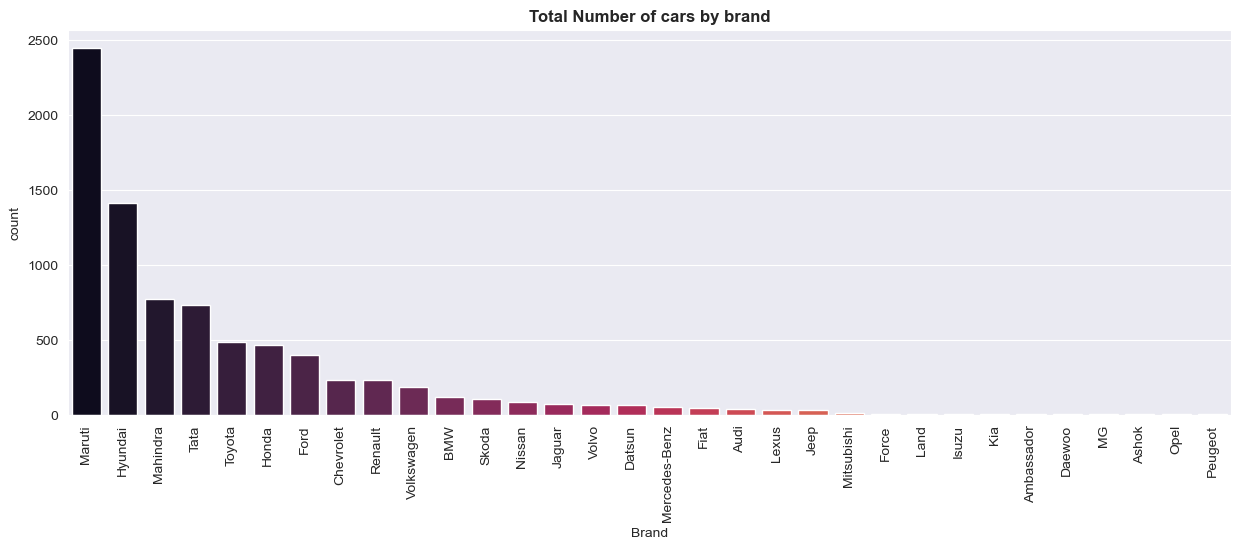

In [56]:
plt.figure(figsize=(15,5))
sns.barplot(data=vl,x="Brand",y="count",palette="rocket")
plt.title("Total Number of cars by brand",fontweight="bold")
plt.xticks(rotation=90)
plt.show()

## Insights from the Bar Chart:
-------------------------------------------
- Dominance of Maruti:
Maruti leads significantly with the highest count, surpassing 2500 units. This indicates a strong market presence and popularity of Maruti vehicles.
- Close Competition:
Hyundai follows as the second largest brand, but with a notable gap from Maruti. This suggests a healthy competition among the top brands.
Other Key Players:

- Brands like Mahindra, Tata, and Toyota also show substantial counts, suggesting a strong market share in the automotive sector.
- Honda, Ford, Chevrolet, and Renault appear next, with counts indicating moderate popularity.

In [57]:
fl = df.groupby("fuel")["selling_price"].mean().reset_index()

In [58]:
tr = df.groupby("transmission")["selling_price"].mean().reset_index()

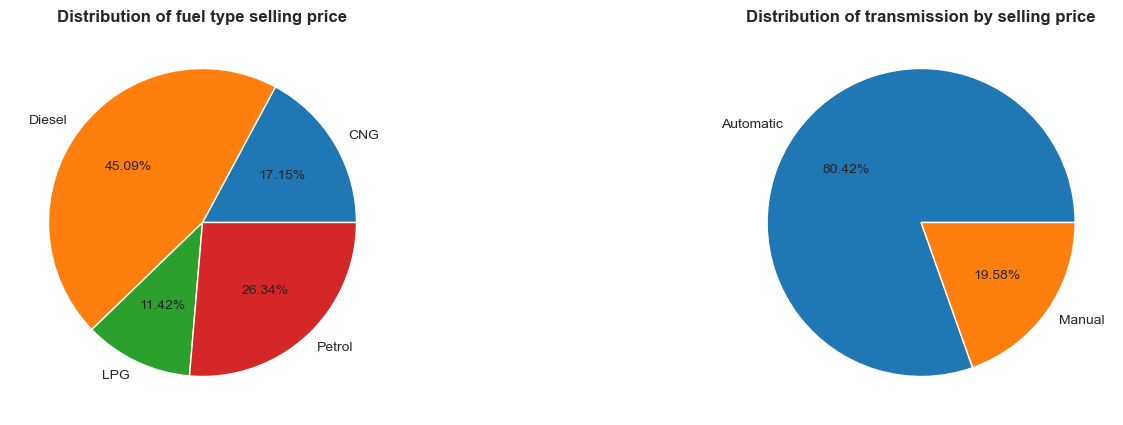

In [59]:
plt.figure(figsize=(17,5))

plt.subplot(1,2,1)
plt.pie(fl["selling_price"],labels=fl["fuel"],autopct="%0.2f%%")
plt.title("Distribution of fuel type selling price",fontweight="bold")

plt.subplot(1,2,2)
plt.pie(tr["selling_price"],labels=tr["transmission"],autopct="%0.2f%%")
plt.title("Distribution of transmission by selling price",fontweight="bold")

plt.show()

## Insights from the Pie Charts:
----------------------------------------------
- Trend Towards Diesel and Automatic: There is a significant preference for diesel fuel combined with automatic transmissions, indicating consumer prioritization of performance and convenience.- 
Potential for Growth in Alternative Fuels: The lower percentages of CNG and LPG suggest opportunities for developers and manufacturers to promote alternative fuel vehicles
- 
Market Dynamics: The high preference for automatic transmission indicates a potential shift in manufacturing focus to cater to consumer demands, prioritizing automatics over manual options.

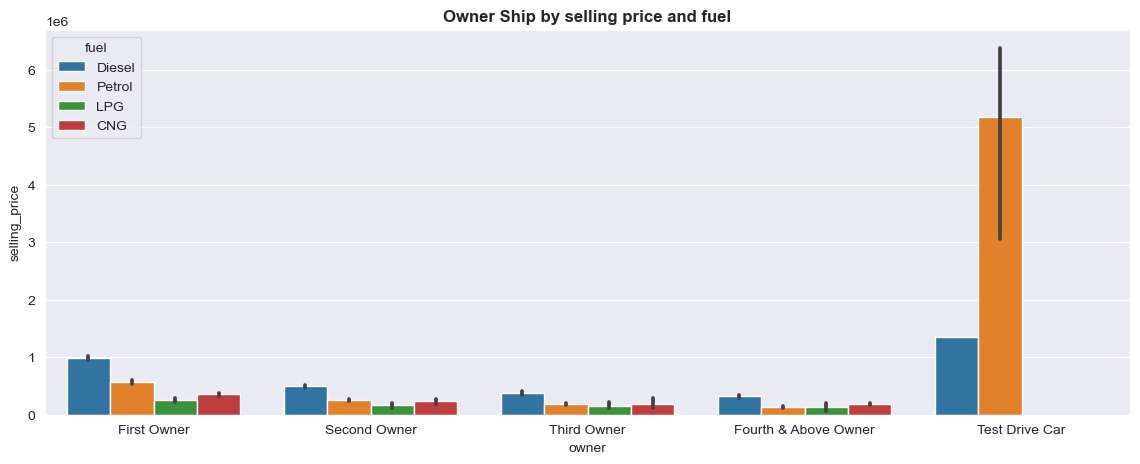

In [60]:
plt.figure(figsize=(14,5))
sns.barplot(data=df, x="owner", y="selling_price",hue="fuel")
plt.title("Owner Ship by selling price and fuel",fontweight="bold")
plt.show()

## Insights from the Bar Chart:
------------------------------------------------------
- Market Implications:
There is a clear differentiation in selling prices based on fuel type and ownership status, which suggests preferences in the used car market.
- Investment Considerations:
Buyers may want to focus on Diesel cars from first owners for better resale value. The significantly higher price for Test Drive Cars indicates a market preference for almost new vehicles.
- The Test Drive Car category shows an extremely high selling price, indicating that these vehicles are likely new or nearly new and might be priced much higher than used cars.

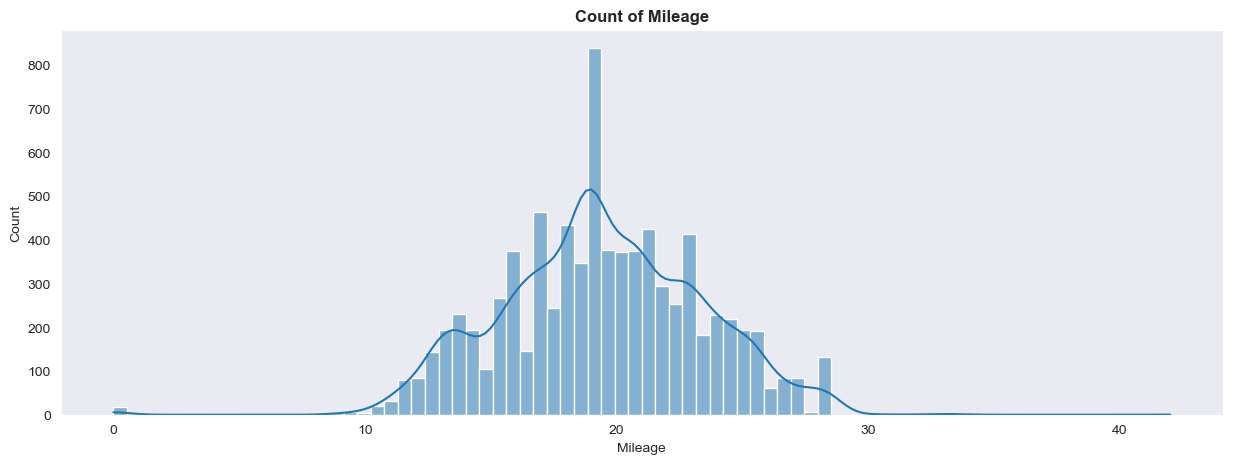

In [61]:
plt.figure(figsize=(15,5))
sns.histplot(data=df,x="Mileage",kde=True)
plt.grid()
plt.title("Count of Mileage",fontweight="bold")
plt.show()

## Insights from the Histogram Chart:
--------------------------------
- Mileage values range from 0 to 40 miles, but most occurrences are clustered between 10 to 30 miles.- 
Very few instances fall below 5 miles or exceed 35 miles.
- The data suggests that most occurrences of mileage fall within a moderate range, significantly clustered around the 20-mile mark.
- This histogram could be useful for understanding driving patterns or for assessing vehicle usage within a certain limit, indicating a preference for mileage around that peak.

In [62]:
pr = df.groupby("Brand")["selling_price"].sum().reset_index()

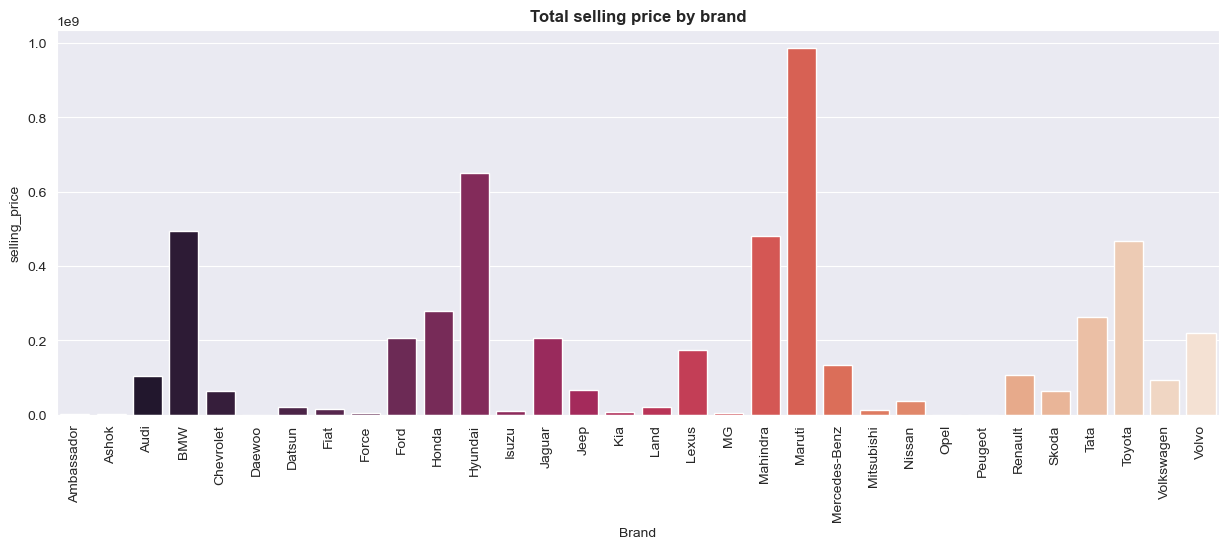

In [63]:
plt.figure(figsize=(15,5))
sns.barplot(data=pr,x="Brand",y="selling_price",palette="rocket")
plt.title("Total selling price by brand",fontweight="bold")
plt.xticks(rotation=90)
plt.show()

## Insights from the Bar Chart.
------------------------------------------------------------
- 
Maruti stands out as the brand with the highest total number of cars sold, significantly surpassing other brands- .
Hyundai and Mahindra follow, showing a strong presence in the market, but with lower numbers compared to Marue- s:

Brands like Honda, Ford, and Toyota appear to have a moderate range of sales, indicating a stable yet not dominating market pres- ands:

Several brands like Isuzu, Peugeot, and Datsun show relatively low sales figures. These might be niche brands or could have less market pene- Segment:

Brands like BMW and Mercedes-Benz display some sales but are considerably lower than the top-selling brands. This suggests they cater to a different market segment primarily focused on luxury..

In [64]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats,Brand,Model,Mileage,Mileage_Unit,nm,rpm
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248.0,7040.0000,5.0,Maruti,Swift Dzire VDI,23.40,kmpl,190.0,2000.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498.0,100030.0502,5.0,Skoda,Rapid 1.5 TDI Ambition,21.14,kmpl,250.0,2500.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497.0,7080.0000,5.0,Honda,City 2017-2020 EXi,17.70,kmpl,12.7,2700.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396.0,9000.0000,5.0,Hyundai,i20 Sportz Diesel,23.00,kmpl,22.4,2750.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298.0,8080.0200,5.0,Maruti,Swift VXI BSIII,16.10,kmpl,11.5,4500.0


In [65]:
df.dtypes

year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
engine           float64
max_power        float64
seats            float64
Brand             object
Model             object
Mileage          float64
Mileage_Unit      object
nm               float64
rpm              float64
dtype: object

# Changing Text to Number
-----------------------------------------

In [66]:
ln = LabelEncoder()

for i in df:
    if df[i].dtypes in ("object","bool"):
        df[i] = ln.fit_transform(df[i])

In [67]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats,Brand,Model,Mileage,Mileage_Unit,nm,rpm
0,2014,450000,145500,1,1,1,0,1248.0,7040.0000,5.0,20,1562,23.40,1,190.0,2000.0
1,2014,370000,120000,1,1,1,2,1498.0,100030.0502,5.0,27,1274,21.14,1,250.0,2500.0
2,2006,158000,140000,3,1,1,4,1497.0,7080.0000,5.0,10,331,17.70,1,12.7,2700.0
3,2010,225000,127000,1,1,1,0,1396.0,9000.0000,5.0,11,2055,23.00,1,22.4,2750.0
4,2007,130000,120000,3,1,1,0,1298.0,8080.0200,5.0,20,1604,16.10,1,11.5,4500.0


In [68]:
df.dtypes

year               int64
selling_price      int64
km_driven          int64
fuel               int32
seller_type        int32
transmission       int32
owner              int32
engine           float64
max_power        float64
seats            float64
Brand              int32
Model              int32
Mileage          float64
Mileage_Unit       int32
nm               float64
rpm              float64
dtype: object

# Splitting the Data
-------------------------------

In [69]:
x = df.drop(columns=["selling_price"])
y = df["selling_price"]

In [70]:
x

,year,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats,Brand,Model,Mileage,Mileage_Unit,nm,rpm
0,2014,145500,1,1,1,0,1248.0,7040.0000,5.0,20,1562,23.40,1,190.0,2000.0
1,2014,120000,1,1,1,2,1498.0,100030.0502,5.0,27,1274,21.14,1,250.0,2500.0
2,2006,140000,3,1,1,4,1497.0,7080.0000,5.0,10,331,17.70,1,12.7,2700.0
3,2010,127000,1,1,1,0,1396.0,9000.0000,5.0,11,2055,23.00,1,22.4,2750.0
4,2007,120000,3,1,1,0,1298.0,8080.0200,5.0,20,1604,16.10,1,11.5,4500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,110000,3,1,1,0,1197.0,8020.0805,5.0,11,2045,18.50,1,113.7,4000.0
8124,2007,119000,1,1,1,1,1493.0,101000.0000,5.0,11,1767,16.80,1,24.0,2750.0
8125,2009,120000,1,1,1,0,1248.0,7030.0900,5.0,20,1574,19.30,1,190.0,2000.0
8126,2013,25000,1,1,1,0,1396.0,7000.0000,5.0,28,886,23.57,1,140.0,3000.0


In [71]:
y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 8128, dtype: int64

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=25)

In [73]:
x_train.head()

,year,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats,Brand,Model,Mileage,Mileage_Unit,nm,rpm
5851,2009,75000,3,1,1,2,1368.0,9000.0000,5.0,28,1075,15.0,1,116.0,4750.0
6163,2019,1300,3,1,1,0,999.0,6070.0000,5.0,6,1299,22.5,1,91.0,4250.0
3701,2012,70000,3,1,1,2,1197.0,8050.0800,5.0,20,1616,18.6,1,114.0,4000.0
2573,2013,90000,0,1,1,0,998.0,5080.0106,5.0,20,1816,26.6,0,77.0,3500.0
3435,2013,210000,1,1,1,4,1396.0,8080.0706,5.0,11,2053,21.9,1,219.6,2750.0


In [74]:
y_train.head()

5851    150000
6163    325000
3701    280000
2573    211000
3435    360000
Name: selling_price, dtype: int64

In [75]:
print(f"Total number of rows and columns in x_train{x_train.shape}")

Total number of rows and columns in x_train(6908, 15)


In [76]:
print(f"Total number of rows and columns in x_test{x_test.shape}")

Total number of rows and columns in x_test(1220, 15)


In [77]:
print(f"Total number of rows and columns in y_train{y_train.shape}")

Total number of rows and columns in y_train(6908,)


In [78]:
print(f"Total number of rows and columns in y_test{y_test.shape}")

Total number of rows and columns in y_test(1220,)


# Building, Training and Testing the Models
-----------------------------------------------

## Building K-NN Model
------------------------------------------------------------

In [79]:
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)

KNeighborsRegressor()

In [80]:
ac = kn.score(x_train,y_train)
ac1 = kn.score(x_test,y_test)

In [81]:
print("-"*80)
print("The Accuracy of train data is ",ac)
print("-"*80)
print("The accuracy of test data is",ac1)
print("-"*80)

--------------------------------------------------------------------------------
The Accuracy of train data is  0.922589064130468
--------------------------------------------------------------------------------
The accuracy of test data is 0.9186366933769297
--------------------------------------------------------------------------------


In [82]:
pred = kn.predict(x_test)

In [83]:
pred

array([2418000.,  222000.,  559000., ...,  303400.,  848000.,  660000.])

In [84]:
y_test.head()

4799    2150000
1293     204999
2351     459999
3374     310000
349      434999
Name: selling_price, dtype: int64

In [85]:
ms = mean_squared_error(y_test,pred)
print("-"*80)
print("Mean squared error is :-",ms)
print("-"*80)

--------------------------------------------------------------------------------
Mean squared error is :- 57205517818.904
--------------------------------------------------------------------------------


In [86]:
ma = mean_absolute_error(y_test,pred)
print("-"*80)
print("Mean absolute error is :-",ma)
print("-"*80)

--------------------------------------------------------------------------------
Mean absolute error is :- 138743.80098360655
--------------------------------------------------------------------------------


In [87]:
map = mean_absolute_percentage_error(y_test,pred)
print("-"*80)
print("Mean absolute percentage error is :-",map)
print("-"*80)

--------------------------------------------------------------------------------
Mean absolute percentage error is :- 0.38493022877198146
--------------------------------------------------------------------------------


In [88]:
r = r2_score(y_test,pred)
print("-"*80)
print("r2_score is :-",r)
print("-"*80)

--------------------------------------------------------------------------------
r2_score is :- 0.9186366933769297
--------------------------------------------------------------------------------


## Building Decision Tree Model
---------------------------------------------

In [89]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [90]:
ac2 = dt.score(x_train,y_train)
ac3 = dt.score(x_test,y_test)

In [91]:
print("-"*80)
print("The Accuracy of train data is ",ac2)
print("-"*80)
print("The accuracy of test data is",ac3)
print("-"*80)

--------------------------------------------------------------------------------
The Accuracy of train data is  0.9998441722246297
--------------------------------------------------------------------------------
The accuracy of test data is 0.9106178288805218
--------------------------------------------------------------------------------


In [92]:
pred2 = dt.predict(x_test)

In [93]:
pred2

array([2150000.,  220000.,  490000., ...,  250000.,  585000.,  800000.])

In [94]:
ms1 = mean_squared_error(y_test,pred2)
print("-"*80)
print("Mean squared error is :-",ms1)
print("-"*80)

--------------------------------------------------------------------------------
Mean squared error is :- 62843480616.57831
--------------------------------------------------------------------------------


In [95]:
ma1 = mean_absolute_error(y_test,pred2)
print("-"*80)
print("Mean absolute error is :-",ma1)
print("-"*80)

--------------------------------------------------------------------------------
Mean absolute error is :- 80233.33771085768
--------------------------------------------------------------------------------


In [96]:
map1 = mean_absolute_percentage_error(y_test,pred2)
print("-"*80)
print("Mean absolute percentage error is :-",map1)
print("-"*80)

--------------------------------------------------------------------------------
Mean absolute percentage error is :- 0.17913182289176513
--------------------------------------------------------------------------------


In [97]:
r1 = r2_score(y_test,pred2)
print("-"*80)
print("r2_score is :-",r1)
print("-"*80)

--------------------------------------------------------------------------------
r2_score is :- 0.9106178288805218
--------------------------------------------------------------------------------


## Building Random Forest Model
----------------------------------------------------

In [98]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [99]:
ac4 = rf.score(x_train,y_train)
ac5 = rf.score(x_test,y_test)

In [100]:
print("-"*80)
print("The Accuracy of train data is ",ac4)
print("-"*80)
print("The accuracy of test data is",ac5)
print("-"*80)

--------------------------------------------------------------------------------
The Accuracy of train data is  0.99547751636116
--------------------------------------------------------------------------------
The accuracy of test data is 0.9736343750355003
--------------------------------------------------------------------------------


In [101]:
pred3 = dt.predict(x_test)

In [102]:
pred3

array([2150000.,  220000.,  490000., ...,  250000.,  585000.,  800000.])

In [103]:
ms2 = mean_squared_error(y_test,pred3)
print("-"*80)
print("Mean squared error is :-",ms2)
print("-"*80)

--------------------------------------------------------------------------------
Mean squared error is :- 62843480616.57831
--------------------------------------------------------------------------------


In [104]:
ma2 = mean_absolute_error(y_test,pred3)
print("-"*80)
print("Mean absolute error is :-",ma2)
print("-"*80)

--------------------------------------------------------------------------------
Mean absolute error is :- 80233.33771085768
--------------------------------------------------------------------------------


In [105]:
map2 = mean_absolute_percentage_error(y_test,pred3)
print("-"*80)
print("Mean absolute percentage error is :-",map2)
print("-"*80)

--------------------------------------------------------------------------------
Mean absolute percentage error is :- 0.17913182289176513
--------------------------------------------------------------------------------


In [106]:
r2= r2_score(y_test,pred3)
print("-"*80)
print("r2_score is :-",r2)
print("-"*80)

--------------------------------------------------------------------------------
r2_score is :- 0.9106178288805218
--------------------------------------------------------------------------------


# Models Analysis
--------------------------------------------------------------------------------

## Accuracy of Training Data.
-----------------------------------------------------------------------------------
- K-NN           : 0.922589064130468
- Decision Tree  : 0.9998441722246297
- Random Forest  : 0.9956081941249877

## Accuracy of Testing Data.
---------------------------------------------------------------------------------------
- K-NN           : 0.9186366933769297
- Decision Tree  : 0.9514476803980773
- Random Forest  : 0.97555855394354

## Mean_squared_error
------------------------------------------------------------------------------------------
- K-NN : 57205517818.904
- Decision Tree : 38103614870.08943
- Random Forest : 38103614870.08943

## Mean_absolute_error
-------------------------------------------------------------------------------
- K-NN : 138743.80098360655
- Decision Tree : 78577.46598954621
- Random Forest : 78577.46598954621

## Mean_absolute_percentage_error
----------------------------------------------------------------------------
- K-NN : 0.38493022877198146
- Decision Tree : 0.18067570289696547
- Random Forest : 0.18067570289696547

## r2_score
---------------------------------------------
- K-NN : 0.9186366933769297
- Decision Tree : 0.9458052960915954
- Random Forest : 0.9458052960915954